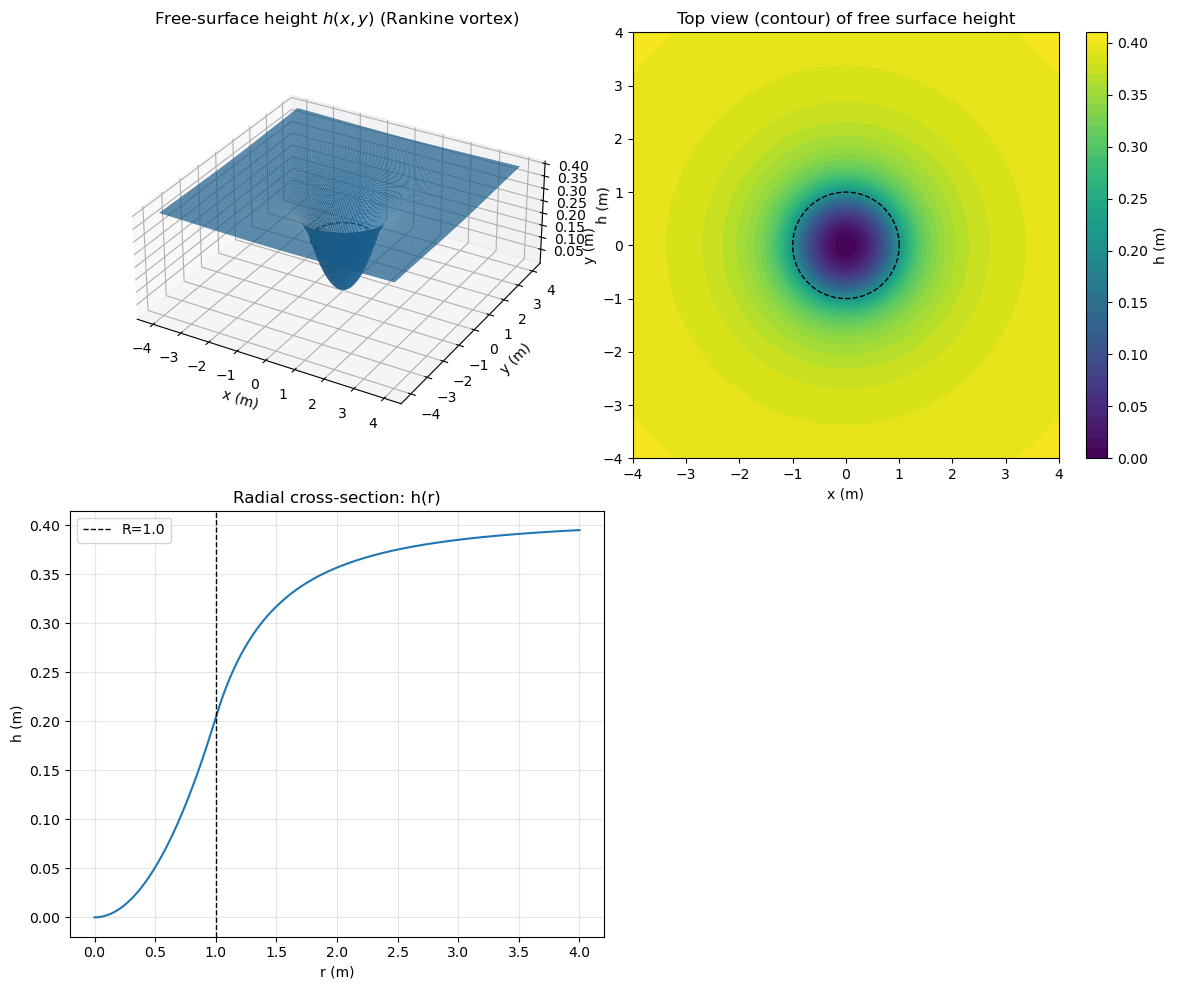

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # Create the 3D projection

def h_rankine(r, Omega=1.0, R=1.0, g=9.81, h0=0.0):
    r = np.asarray(r)
    h = np.empty_like(r, dtype=float)

    # Inner region is r <= R
    inner = (r <= R)
    h[inner] = h0 + (Omega**2 / (2.0 * g)) * r[inner]**2

    # Outer region is r > R
    outer = ~inner
    # Avoid division by zero for r=0, otherwise we have a singualrity to deal with
    h[outer] = h0 + (Omega**2 * R**2 / (2.0 * g)) * (2.0 - (R**2 / r[outer]**2))

    return h

if __name__ == "__main__":
    # Set parameters on order of real world application
    Omega = 2.0       # angular speed [rad/s]
    R = 1.0           # core radius [m]
    g = 9.81          # gravity [m/s^2]
    h0 = 0.0          # reference height at r=0 (m)

    # 2D grid in x,y to evaluate h(x,y)
    extent = 4.0      # half-width of domain in meters
    N = 350           # grid size
    xs = np.linspace(-extent, extent, N)
    ys = np.linspace(-extent, extent, N)
    X, Y = np.meshgrid(xs, ys)
    Rgrid = np.sqrt(X**2 + Y**2)

    H = h_rankine(Rgrid, Omega=Omega, R=R, g=g, h0=h0)

    # 3D surface plot
    fig = plt.figure(figsize=(12, 10))

    ax1 = fig.add_subplot(221, projection='3d')
    # To keep the plot smooth and limit the time taken to generate we decompose the grid
    subs = max(1, N // 120)
    Xs = X[::subs, ::subs]
    Ys = Y[::subs, ::subs]
    Hs = H[::subs, ::subs]
    surf = ax1.plot_surface(Xs, Ys, Hs, rstride=1, cstride=1, linewidth=0, antialiased=True, alpha=0.9)
    ax1.set_title("Free-surface height $h(x,y)$ (Rankine vortex)")
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('y (m)')
    ax1.set_zlabel('h (m)')
    ax1.set_box_aspect((1,1,0.4))  # make z vertical scale smaller to easily see the vortex
    # plot reference circle at r=R on surface to show where the boundary of behaviour exists
    theta = np.linspace(0, 2*np.pi, 300)
    xc = R * np.cos(theta); yc = R * np.sin(theta)
    hc = h_rankine(R, Omega=Omega, R=R, g=g, h0=h0)
    ax1.plot(xc, yc, hc*np.ones_like(theta), ls='--', color='k', lw=1)

    # Top-down contour map to show height
    ax2 = fig.add_subplot(222)
    levels = 40
    cont = ax2.contourf(X, Y, H, levels=levels)
    ax2.set_aspect('equal')
    ax2.plot(xc, yc, 'k--', lw=1)
    ax2.set_title("Top view (contour) of free surface height")
    ax2.set_xlabel('x (m)')
    ax2.set_ylabel('y (m)')
    plt.colorbar(cont, ax=ax2, label='h (m)')

    # Radial cross-section plot of h against r
    ax3 = fig.add_subplot(223)
    rvals = np.linspace(0.0, extent, 500)
    hvals = h_rankine(rvals, Omega=Omega, R=R, g=g, h0=h0)
    ax3.plot(rvals, hvals, '-')
    ax3.axvline(R, color='k', ls='--', lw=1, label=f'R={R}')
    ax3.set_xlabel('r (m)')
    ax3.set_ylabel('h (m)')
    ax3.set_title('Radial cross-section: h(r)')
    ax3.legend()
    ax3.grid(alpha=0.3)


    plt.tight_layout()
    plt.show()
